smCCP analysis of tmRNA
=======================

This is an example RNAvigate workflow for visualization of smCCP analysis of tmRNA.

Data were originally published by Mustoe et. al. 2019. [pdf](https://weekslab.com/wp-content/uploads/sites/9/2021/01/2019_am_pnas.pdf)

The supplemental data for this publication include processed ShapeMapper2 and PairMapper data, reference sequence and secondary structure of tmRNA, and DMS/PAIR-constrained structure models. To obtain RingMapper files, the raw sequencing reads were downloaded from the GEO (GSE135211), and processed with ShapeMapper2 and Ringmapper. Cryo-EM structure 6q9A was downloaded from the PDB, and the tmRNA chain was isolated using pymol. These steps yield the files needed in this example:
- 6q9A_tmRNA.pdb
- cellfree_tmRNA_profile.txt
- cellfree_tmRNA_rings.txt
- cellfree_tmRNA-pairmap.txt
- cellfree_tmRNA.all.f.ct
- incell_tmRNA_profile.txt
- incell_tmRNA_rings.txt
- incell_tmRNA-pairmap.txt
- incell_tmRNA.all.f.ct
- tmRNA.ct
- tmRNA.fa

## Import RNAvigate

In [1]:
import rnavigate as rnav

## Define the experimental samples and provide input file names

- sample: an arbitrary string used as a label on plots
- dmsmap: a ShapeMapper2 profile.txt. Data will be renormalized for DMS by RNAvigate automatically.
- ringmap: a RingMapper correlations file
- pairmap: a PairMapper pairmap.txt file
- ct: a previously published structure as a .ct file
- compct: a data-informed minimum free energy model as a .ct file
- pdb: a cryo-EM structure model as a .pdb file

In [2]:
common_data = rnav.Sample(
    ct="tmRNA.ct",
    pdb={"filepath": "6q9A_tmRNA.pdb",
         "chain": "4",
         "fasta": "tmRNA.fa"})

cf = rnav.Sample(
    sample="Cell-free",
    inherit=common_data,
    dmsmap="cellfree_tmRNA_profile.txt",
    ringmap="cellfree_tmRNA_rings.txt",
    pairmap="cellfree_tmRNA-pairmap.txt",
    compct="cellfree_tmRNA.all.f.ct")

ic = rnav.Sample(
    sample="In cell",
    inherit=common_data,
    dmsmap="incell_tmRNA_profile.txt",
    ringmap="incell_tmRNA_rings.txt",
    pairmap="incell_tmRNA-pairmap.txt",
    compct="incell_tmRNA.all.f.ct")

## Compare modified mutation rates with a skyline plot

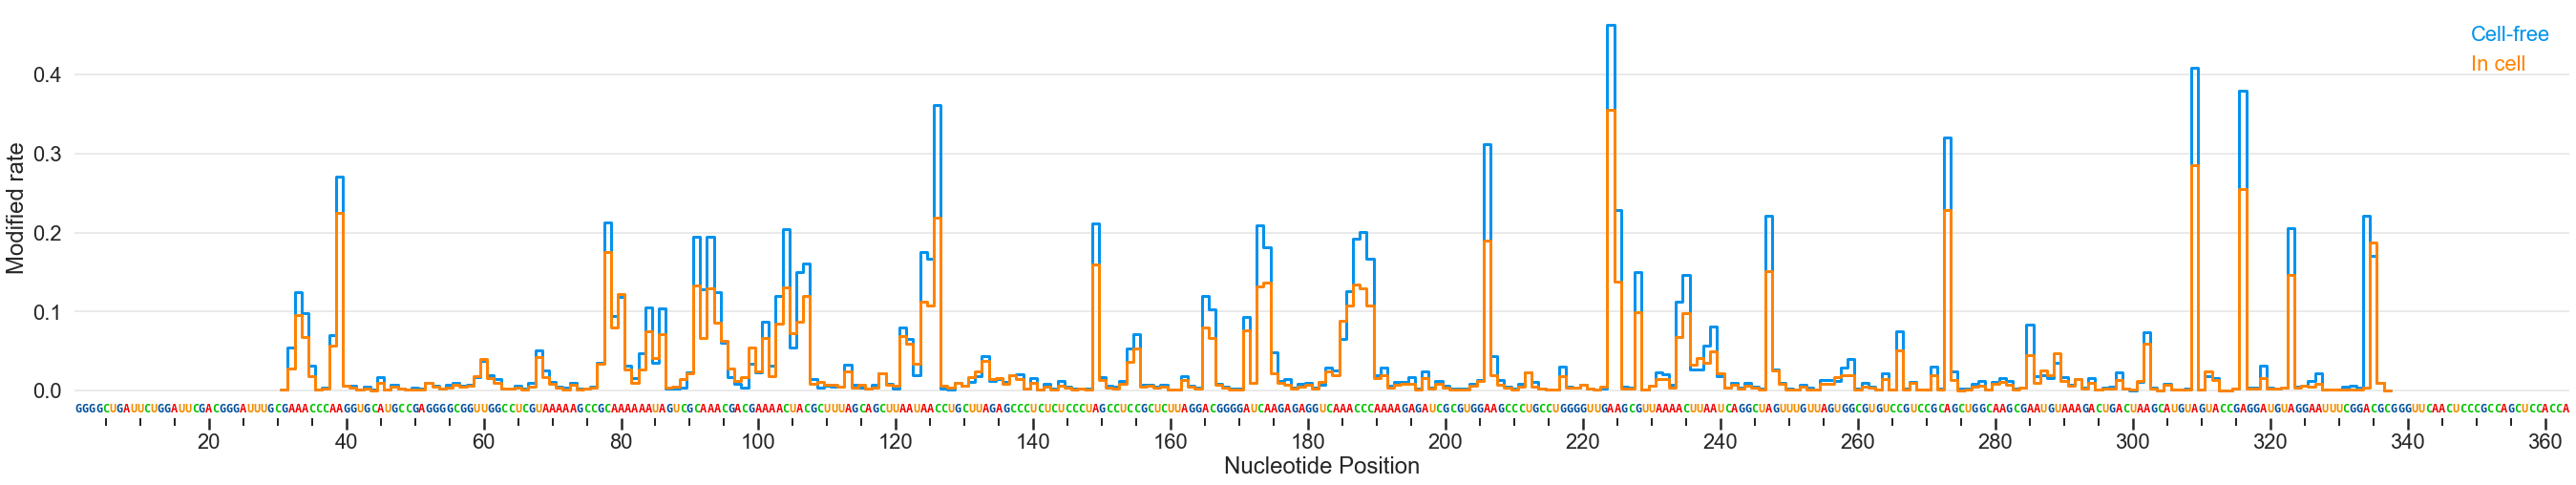

In [3]:
plot = rnav.plot_skyline(
    samples=[cf, ic],
    profile="dmsmap",             # default, not necessary
    columns="Modified_rate")
# plot.save("tmrna_skyline.svg")    # saves plot as an svg file

## Compare structure models to previously published model and display PAIRs

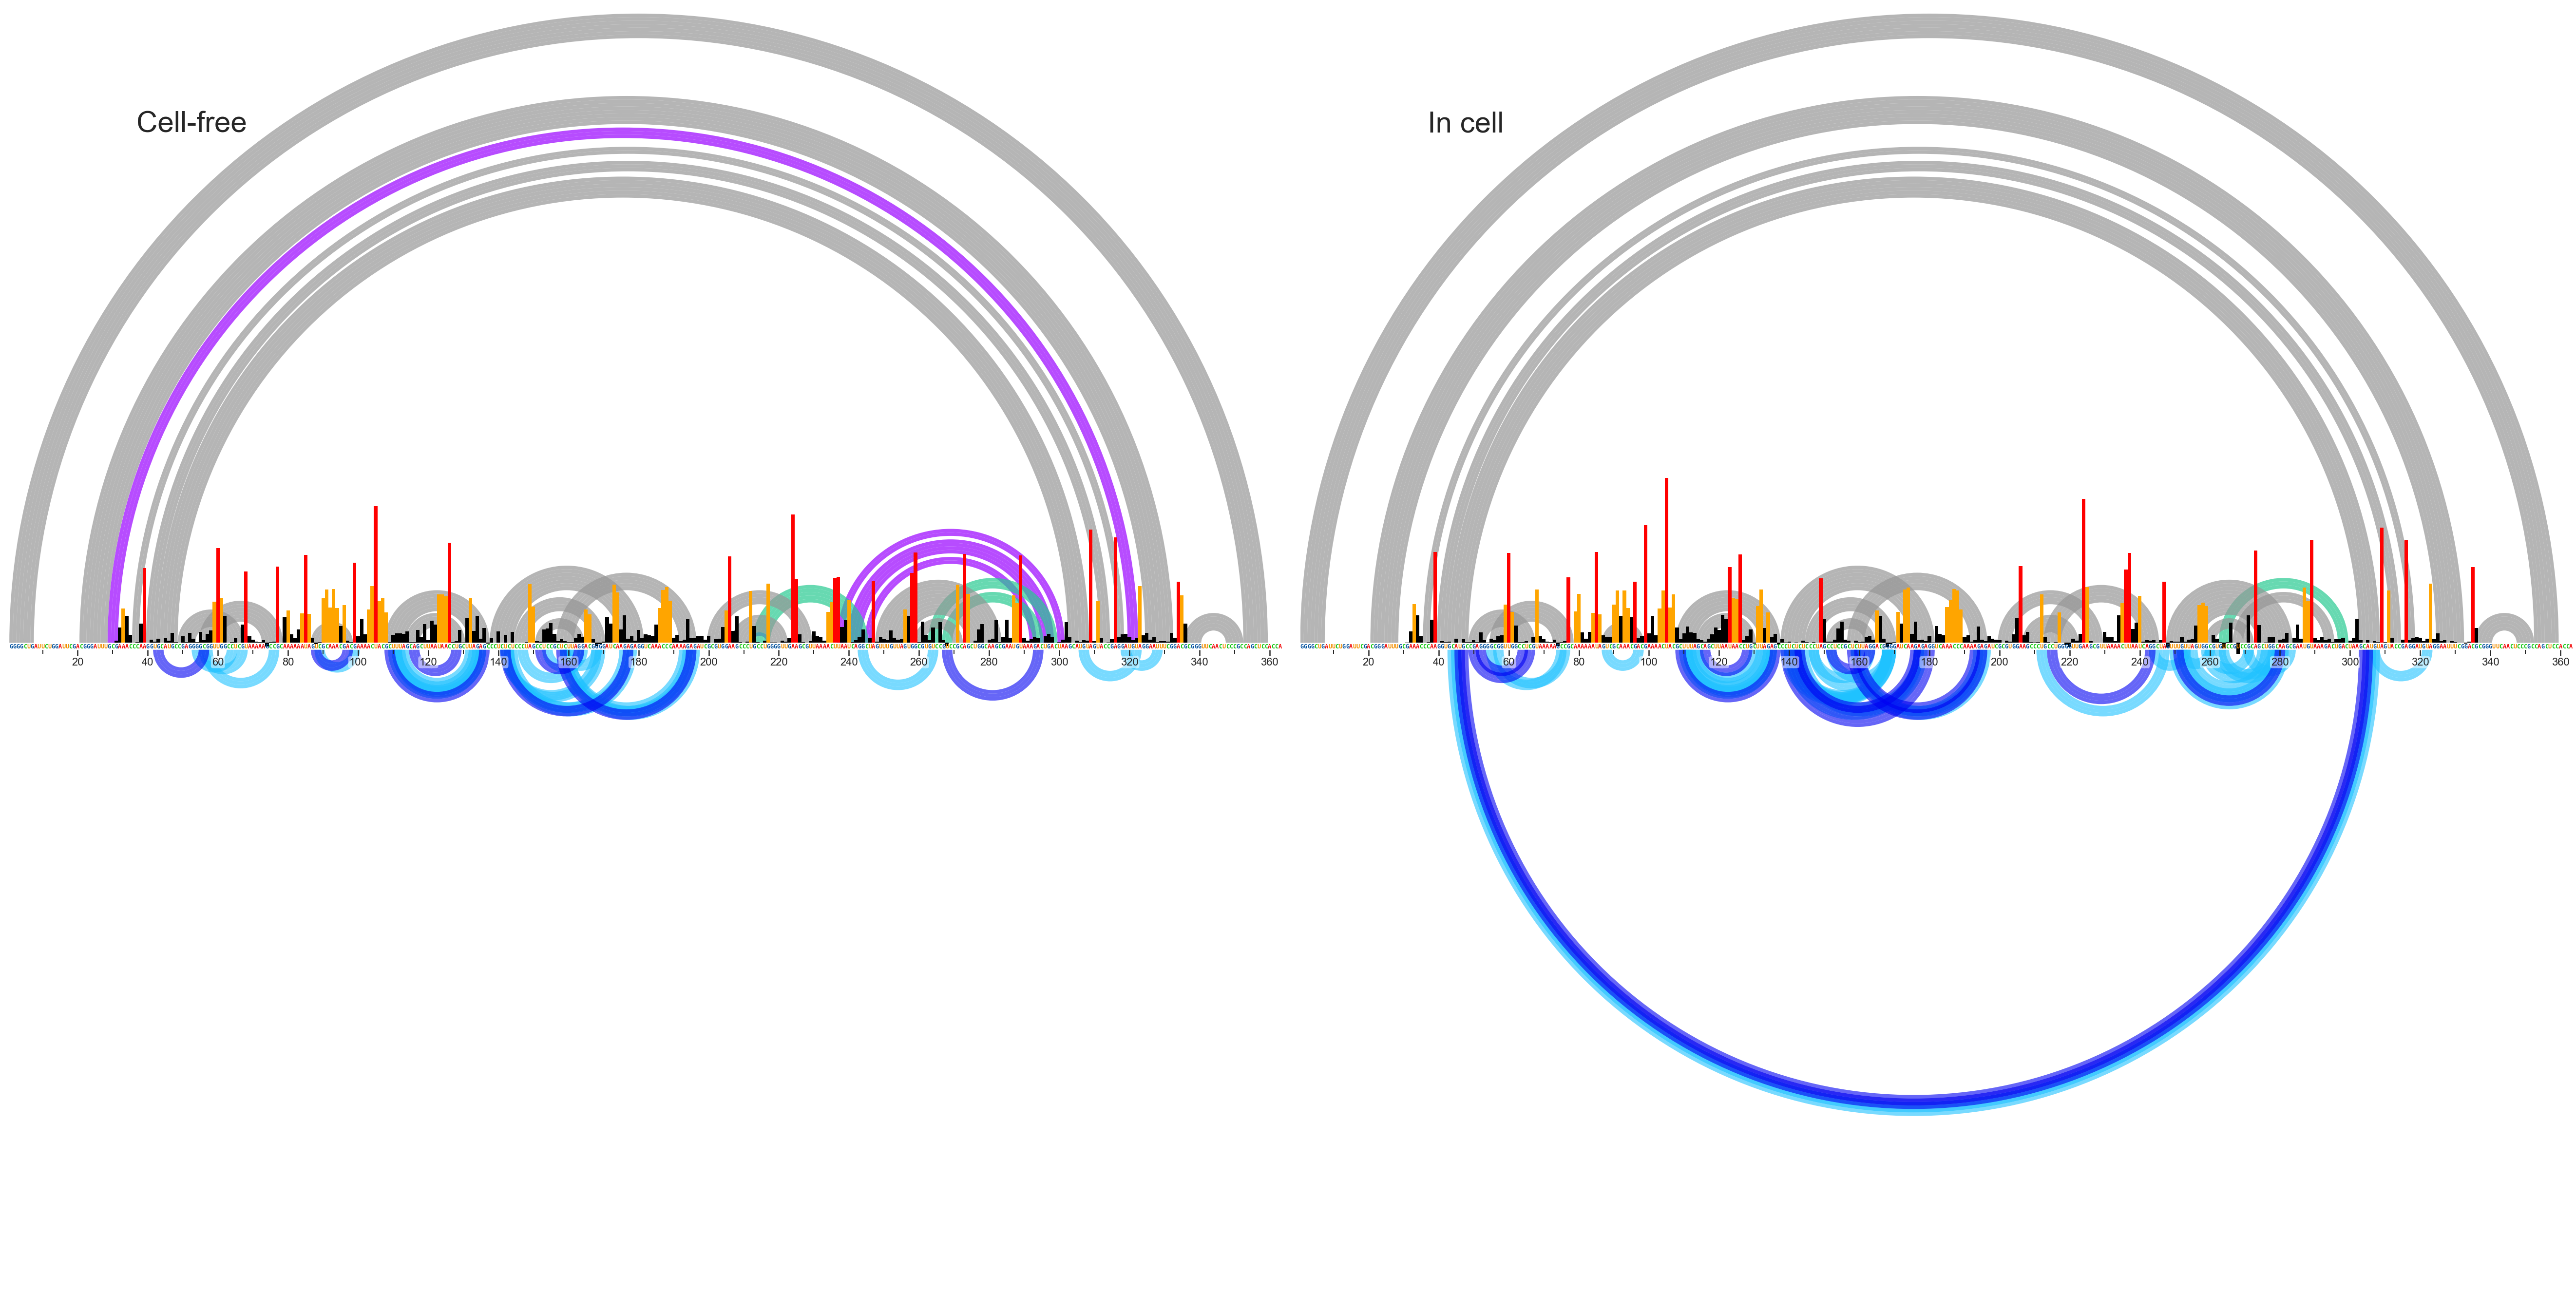

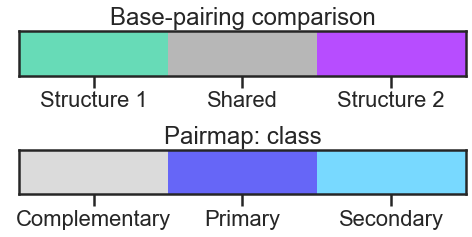

In [4]:
plot = rnav.plot_arcs(
    ct="ct",                       # default, not necessary
    comp="compct",
    samples=[cf, ic],
    profile="dmsmap",              # default, not necessary
    interactions="pairmap",
    profile_scale_factor=2,        # increases height of bars relative to arcs
    plot_error=False               # do not plot error bars
)
# plot.save("tmrna_arcs.svg")      # saves the plot as an svg file

## Display filtered RINGs on a cryo-EM structure
Here, we calculate mutual information scores for RINGs to be used to filter RINGs.

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

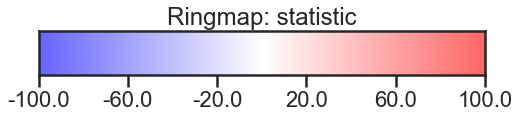

In [5]:
for sample in [cf, ic]:
    sample.data["ringmap"].data.eval("MI = Statistic / (2 * Mod_Depth)", inplace=True)

plot = rnav.plot_mol(
    samples=[cf, ic],
    # profile="dmsmap",               # default, not necessary
    nt_color="grey",
    interactions="ringmap",
    interactions_filter={
        "MI_ge": 0.000025,
        "ss_only": True,
        "positive_only": True,
        "Statistic_ge": 23,
        "min_cd": 15,
        "Zij_ge": 2},
    plot_kwargs={
        "width": 1000,
        "height": 1000,
        "background_alpha": 0,
        "orientation": [-177.55,-335.68,-210.36,-408.72,-0.27,-0.14,0.22,-0.93],
    },
    hide_cylinders=True)

In [6]:
# plot.save()